In [104]:
!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


In [105]:
!ls track

driving_log.csv  IMG


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import ntpath
import random
import pandas as pd 
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import matplotlib.image as mpimg


In [107]:
datadir='track'
print(data)
columns=['centre','left','right','steering','throtle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)
pd.set_option('display.max_colwidth',-1)

data.head()
def path_leaf(path):
  head,tail=ntpath.split(path)
  return tail

data['centre']=data['centre'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)




                                  centre                              left  \
2     center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
8     center_2018_07_16_17_11_44_137.jpg  left_2018_07_16_17_11_44_137.jpg   
12    center_2018_07_16_17_11_44_413.jpg  left_2018_07_16_17_11_44_413.jpg   
13    center_2018_07_16_17_11_44_485.jpg  left_2018_07_16_17_11_44_485.jpg   
14    center_2018_07_16_17_11_44_558.jpg  left_2018_07_16_17_11_44_558.jpg   
15    center_2018_07_16_17_11_44_627.jpg  left_2018_07_16_17_11_44_627.jpg   
16    center_2018_07_16_17_11_44_697.jpg  left_2018_07_16_17_11_44_697.jpg   
17    center_2018_07_16_17_11_44_769.jpg  left_2018_07_16_17_11_44_769.jpg   
22    center_2018_07_16_17_11_45_120.jpg  left_2018_07_16_17_11_45_120.jpg   
23    center_2018_07_16_17_11_45_190.jpg  left_2018_07_16_17_11_45_190.jpg   
24    center_2018_07_16_17_11_45_261.jpg  left_2018_07_16_17_11_45_261.jpg   
25    center_2018_07_16_17_11_45_333.jpg  left_2018_07_16_17_11_

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


<Container object of 25 artists>

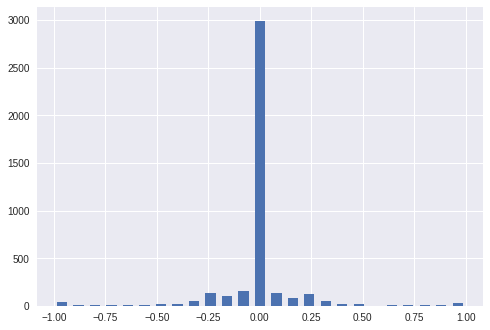

In [108]:
data.head()

num_bins=25
sample_per_bin=200
hist,bins=np.histogram(data['steering'],num_bins)
print(bins)
cent=(bins[:-1]+bins[1:])*0.5
print(cent)
plt.bar(cent,hist,width=0.05)


      

 

In [109]:
remove_list= []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  #print(list_)
  list_=shuffle(list_)
  #print(list_)
  list_=list_[sample_per_bin:]
  #print(list_)
  remove_list.extend(list_)
  print(remove_list)


  

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3157, 1125, 91, 2430, 787, 2804, 2680, 3982, 687, 1538, 1287, 3912, 749, 746, 2556, 3123, 1968, 1460, 1583, 348, 403, 637, 2778, 1540, 2258, 2472, 2528, 1148, 2615, 2511, 1468, 1390, 3199, 1615, 3853, 1420, 3437, 797, 2677, 2669, 1884, 2265, 3092, 697, 1959, 1262, 2928, 148, 3224, 378, 3205, 681, 3654, 2004, 1969, 4041, 2779, 3562, 1705, 86, 1905, 303, 3229, 2231, 2912, 1941, 6, 3630, 3569, 3647, 3265, 3810, 3758, 2270, 2300, 265, 1991, 521, 1382, 1936, 614, 2934, 3453, 379, 873, 2037, 3797, 2727, 3910, 3659, 1295, 426, 1, 295, 1397, 988, 3380, 153, 1392, 4006, 388, 1631, 4021, 1869, 3402, 2853, 2896, 1604, 1562, 4035, 3348, 187, 2565, 1749, 869, 733, 3898, 2905, 3384, 1017, 2282, 3714, 648, 2889, 1022, 628, 2370, 1005, 802, 152, 3956, 131, 449, 2725, 1501, 1426, 2250, 2785, 3340, 1405, 3496, 422, 3431, 2283, 3683, 334, 2170, 280, 693, 744, 396, 2428, 3111, 3095, 3559, 3230, 224, 1013, 3957, 3536, 284, 1516, 1867, 3448, 3997, 3361, 871, 1934, 2670, 

In [110]:
data.drop(data.index[remove_list],inplace=True)
print(len(data))

1263


<Container object of 25 artists>

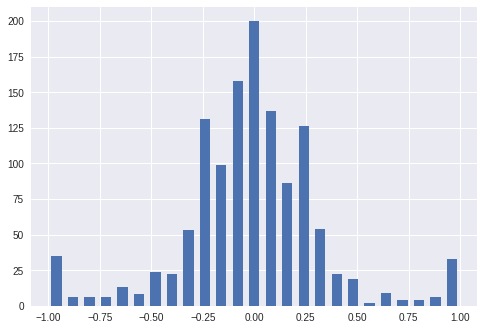

In [112]:
hist,_=np.histogram(data['steering'],(num_bins))
plt.bar(cent,hist,width=0.05)

In [130]:
print(data.iloc[0])
def load_img_steering(datadir,df):
  image_path=[]
  steering=[]
  for i in range(len(data)):
    indexed_data=data.iloc[i]
    centre,left,right=indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,centre.strip()))
    steering.append(float(indexed_data[3]))
    image_paths=np.asarray(image_path)
    steerings=np.asarray(steering)
  return image_paths,steerings

centre      center_2018_07_16_17_11_44_209.jpg
left        left_2018_07_16_17_11_44_209.jpg  
right       right_2018_07_16_17_11_44_209.jpg 
steering    0                                 
throtle     0.0240059                         
reverse     0                                 
speed       0.620654                          
Name: 9, dtype: object


traning samples:884
 valid_samples:379


Text(0.5,1,'validation set')

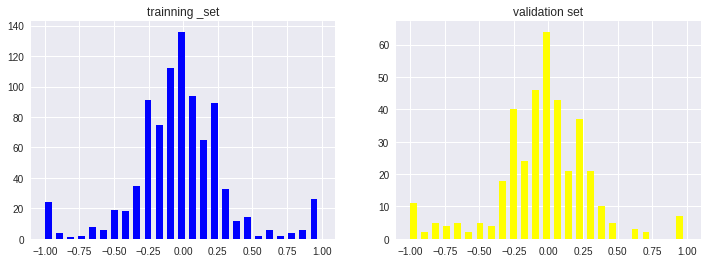

In [129]:
image_paths,steerings=load_img_steering(datadir+ '/IMG',data)


x_train,x_valid,y_train,y_valid=train_test_split(image_paths,steerings,test_size=.30,random_state=6)

print('traning samples:{}\n valid_samples:{}'.format(len(x_train),len(x_valid)))

fig,axes = plt.subplots(1,2,figsize=(12,4))

axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title('trainning _set')
axes[1].hist(y_valid,bins=num_bins,width=0.05,color='yellow')
axes[1].set_title('validation set')

In [0]:
image=image_paths[100]


In [0]:
def img_process(image):
  image=mpimg.imread(image)
  return image